文本预处理之文本预料的数据分析
===
帮助我们理解语料

# 1.标签数量的分布

,label,review
5446,0,这是我住过的最差的五星级酒店！8月5日住的所谓经济间，504元/晚；房间很小，通道小的只容下...
5056,1,如家的标准装潢，没的说，不过还和楼下的一样的老问题，水温是确实的忽冷忽热，隔音也是确实的惨了...
942,1,7月23日-26日住了三晚，338的大床房，床是2米*2米的，超爽，其它房间内设施一般，稍微...
5923,0,以为和温州的华侨饭店一个系统，入住发现像校办酒店，房间隔音很差，而且不仅是左右，楼上的动静也...
1491,1,总体感觉很不错，酒店的地理位置很好，出行很方便，而且对面就是市政府，景观效果很好，房间面积也...
...,...,...
4537,1,"早餐份量很足,四个人吃两个人的份量都吃不完!!!"
5657,0,本人一家大小是6月7日入住、8日Out，对淋浴间很不满意全玻璃、人在里面所做的动作清楚看到，...
7099,0,"服务极差,有时候没空调!服务态度恶略!没空调问服务员要风扇,1小时过去了,都没来.投诉后才马..."
6817,0,房间很新，床计较舒服，毛巾和床单都是新的，布局比较适合家庭度假。就是服务不够宣称的星级标准。...


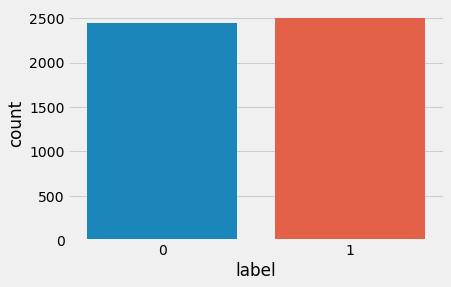

In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

plt.style.use('fivethirtyeight')
pdForm = pd.read_csv('/Users/JJZHK/data/input/enwiki/hotel_comments.csv')
pdForm = pdForm.dropna(axis=0, how='any')
data_No = pdForm[pdForm['label'] == 1]
data_one = data_No.sample(n=2500)
data_zero = pdForm[pdForm['label'] == 0]
pdForm = pd.concat([data_zero, data_one], axis=0)
pdForm = pdForm.sample(n=len(pdForm))
sns.countplot(x="label", data=pdForm)
pdForm

# 2.句子长度分析

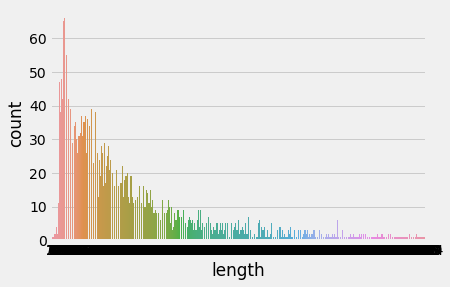

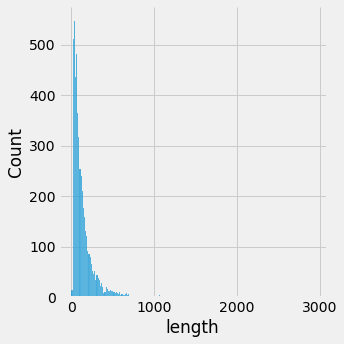

In [198]:
train_data = pdForm
train_data["length"] = list(map(lambda x: len(x), train_data["review"]))
sns.countplot(x="length", data=train_data)
sns.displot(train_data["length"])

# 3.词频统计与关键词词云

<AxesSubplot:xlabel='label', ylabel='length'>

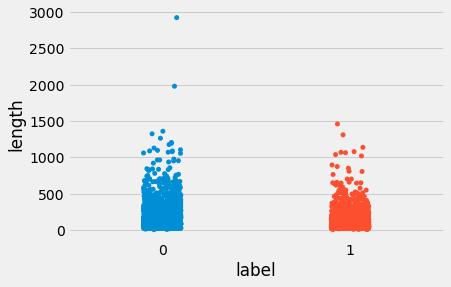

In [199]:
sns.stripplot(y='length', x='label', data=train_data)

## 获得训练集不同词汇总数的统计

In [202]:
import jieba
from itertools import chain
train_vocab = set(chain(*map(lambda x : jieba.lcut(x), train_data['review'])))
print("集合共包含不同词汇总数为:", len(train_vocab))

集合共包含不同词汇总数为: 24152


## 获得正负样本的高频形容词词云

In [210]:
import jieba.posseg as pseg
def get_a_list(text):
    r = []
    for g in pseg.lcut(text):
        if g.flag == 'a':
            r.append(g.word)
    
    return r

In [219]:
import wordcloud
def get_word_cloud(keywords_list):
    wd = WordCloud(font_path='../SimHei.ttf', max_words=100, background_color='black')
    keywords_string = " ".join(keywords_list)
    wd.generate(keywords_string)

    plt.figure()
    plt.imshow(wd, interpolation="bilinear")
    plt.axis("off")

In [221]:
p_train_data = train_data[train_data["label"] == 1]["review"]
train_p_a_vocab = chain(*map(lambda x : get_a_list(x), p_train_data))
print(train_p_a_vocab)

In [222]:
n_train_data = train_data[train_data['label'] == 0]['review']
train_n_a_vocab = chain(*map(lambda x : get_a_list(x), n_train_data))

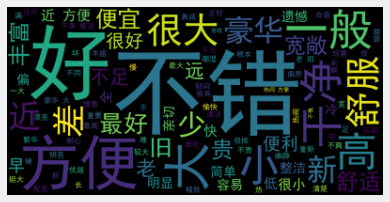

In [223]:
get_word_cloud(train_p_a_vocab)

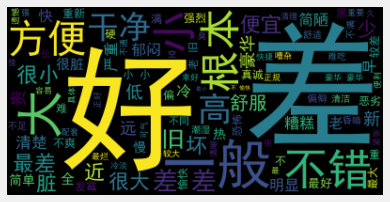

In [224]:
get_word_cloud(train_n_a_vocab)